## Divide and Conquer

Idea:
- A problem instance is divided into several smaller instances of the same problem, ideally of about same size
- The smaller instances are solved, typically recursively
- The solutions for the smaller instances are combined to get a solution to the original problem

### Example: Binary Search

In [2]:
from typing import List


def binary_search(arr: List[int], start: int, end: int, target: int) -> bool:
    """
    Perform binary search on a sorted array.

    Args:
        arr: A sorted list of integers.
        start: The starting index of the subarray to search in.
        end: The ending index of the subarray to search in.
        target: The value to search for in the array.

    Returns:
        True if the target is found in the array, False otherwise.
    """
    # If the start index is greater than the end index, the target is not in the array.
    if start > end:
        return False

    # Calculate the midpoint index.
    mid = (start + end) // 2

    # If the target is found at the midpoint index, return True.
    if target == arr[mid]:
        return True

    # If the target is less than the value at the midpoint index, search the left half of the subarray.
    if target < arr[mid]:
        return binary_search(arr, start, mid - 1, target)
    # If the target is greater than the value at the midpoint index, search the right half of the subarray.
    else:
        return binary_search(arr, mid + 1, end, target)


binary_search([1, 2, 3, 4, 5], 0, 4, 3)


True

### Example: Merge Sort

In [3]:
def merge(left: List[int], right: List[int]) -> List[int]:
    """
    Merge two sorted arrays into a single sorted array.

    Args:
        left: A sorted list of integers.
        right: A sorted list of integers.

    Returns:
        A new sorted list containing all elements from both input lists.
    """
    result = []
    i, j = 0, 0

    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result += left[i:]
    result += right[j:]

    return result


def merge_sort(arr: List[int]) -> List[int]:
    """
    Sort a list of integers using the merge sort algorithm.

    Args:
        arr: A list of integers to sort.

    Returns:
        A new sorted list containing all elements from the input list.
    """
    if len(arr) <= 1:
        return arr

    # Divide the array into two halves.
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]

    # Recursively sort each half.
    left = merge_sort(left)
    right = merge_sort(right)

    # Merge the sorted halves.
    return merge(left, right)


merge_sort([5, 4, 3, 2, 1])


[1, 2, 3, 4, 5]

## Graph

### 2 Types of Graphs

- Undirected Graph
- Directed Graph

(NodeView((0, 1, 2, 3, 4, 5)), EdgeView([(0, 3), (0, 1), (0, 4), (1, 4), (1, 2), (1, 5), (2, 3), (2, 4), (3, 5), (4, 5)]))


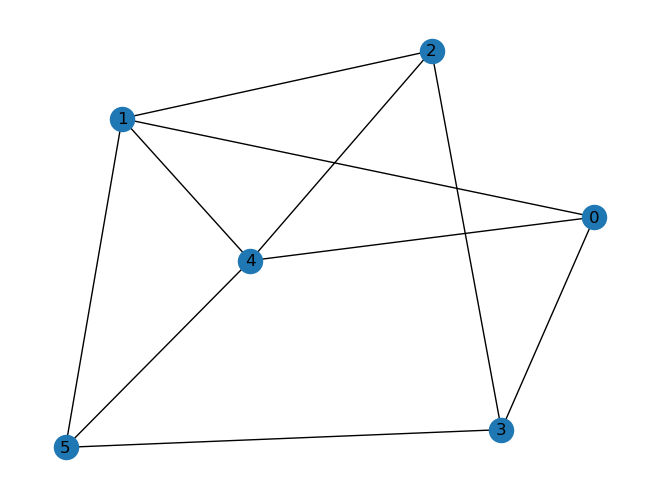

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# create a random graph with 6 nodes and 10 edges
undirectedGraph = nx.gnm_random_graph(6, 10)

# print its annotations in the form of G = (V, E)
print((undirectedGraph.nodes, undirectedGraph.edges))

# draw the graph
nx.draw(undirectedGraph, with_labels=True)
plt.show()


(NodeView((0, 1, 2, 3, 4, 5)), OutEdgeView([(0, 3), (1, 4), (1, 5), (2, 1), (2, 4), (3, 5), (3, 0), (4, 3), (4, 2), (5, 0)]))


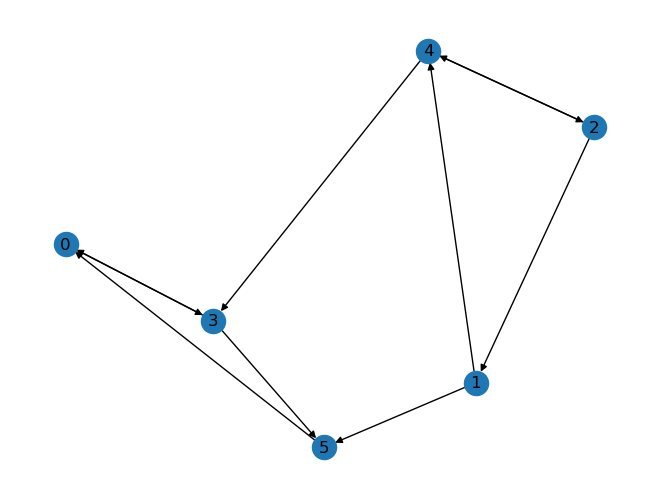

In [5]:
directedGraph = nx.gnm_random_graph(6, 10, directed=True)

print((directedGraph.nodes, directedGraph.edges))

nx.draw(directedGraph, with_labels=True)
plt.show()


### 3 Types of Undirected Graphs

- Simple Graph: No self-loops or parallel edges
- Multigraph: No self-loops, but parallel edges are allowed
- Pseudograph: Self-loops and parallel edges are allowed

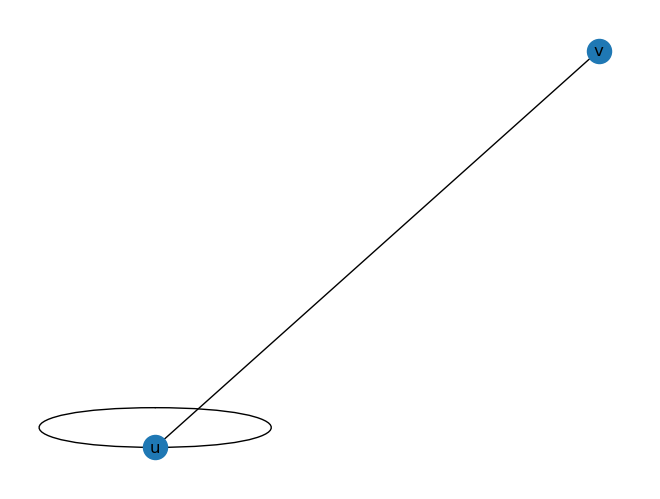

In [6]:
exampleGraph = nx.Graph()

exampleGraph.add_nodes_from(['u', 'v'])
exampleGraph.add_edge('u', 'v')
exampleGraph.add_edge('u', 'u')

nx.draw(exampleGraph, with_labels=True)
plt.show()


### Terms related to Graphs

- Vertex: A node in a graph
- Edge: A connection between two vertices
- Degree: The number of edges connected to a vertex, denoted by $deg(v)$
- (u, v) is said to be incident to both u and v
- u and v are called endpoints of (u, v)
- u and v are said to be adjacent, aka neighbors

In [7]:
# create a graph
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (2, 3)])

# convert to adjacency matrix
A = nx.adjacency_matrix(G)

# print the adjacency matrix
print(A.todense())


[[0 1 1]
 [1 0 1]
 [1 1 0]]


In [8]:
# convert to adjacency list
adj_list = nx.to_dict_of_lists(G)

# print the adjacency list
print(adj_list)


{1: [2, 3], 2: [1, 3], 3: [1, 2]}


In [9]:
# convert to incidence matrix
B = nx.incidence_matrix(G)

# print the incidence matrix
print(B.todense())


[[1. 1. 0.]
 [1. 0. 1.]
 [0. 1. 1.]]


In [12]:
# convert to incidence list
edge_list = [*G.edges]
inc_list = {node: [0] * len(edge_list) for node in G.nodes}

for i, edge in enumerate(edge_list):
    inc_list[edge[0]][i] = 1
    inc_list[edge[1]][i] = 1

print(inc_list)


{1: [1, 1, 0], 2: [1, 0, 1], 3: [0, 1, 1]}
